# The Iris-Dataset: Flower Classification

In this project, I will tackle the Iris Dataset on my own. I will not work off of other public kernels, but instead, only use them for reference when I may be stuck at some point or want something to be more pretty.
Let's first load some common modules and have a look at the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
104,105,6.5,3.0,5.8,2.2,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
123,124,6.3,2.7,4.9,1.8,Iris-virginica
111,112,6.4,2.7,5.3,1.9,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica


In [4]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here are the first observations we are able to make:
1. The feature "Id" is not useful for our analysis, we can drop it.
2. The column names are in CamelCase, we'll change them to snake-case
3. Our target variable is "Species". We'll convert the different flower names to numbers, to make ML methods possible.
4. The dataset is not shuffled. We'll need to shuffle before we can start splitting it into training and test data.

In [6]:
# 1.
iris = iris.drop("Id", axis = 1)

In [7]:
# 2.
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

iris.columns = column_names

In [8]:
# 3. 
species_map = {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}

iris["species"] = iris["species"].map(species_map)

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
# 4.
iris = iris.sample(frac=1).reset_index(drop=True)

Let's set aside 10% of our dataset for testing:

In [11]:
train = iris[:135]
test = iris[135:]

In [12]:
X_train = train[["sepal_length","sepal_width","petal_length","petal_width"]]
y_train = train[["species"]]

In [13]:
X_test = test[["sepal_length","sepal_width","petal_length","petal_width"]]
y_test = test[["species"]]

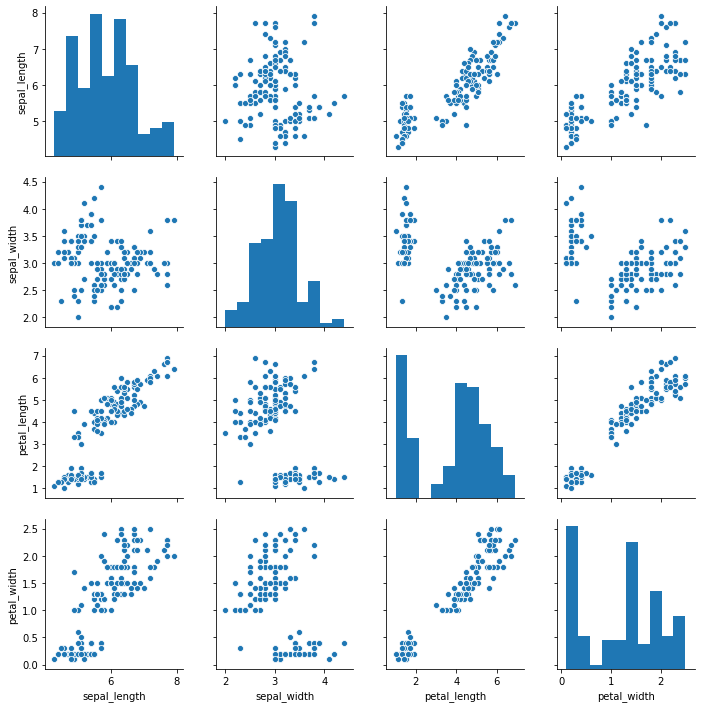

In [14]:
sns.pairplot(X_train)

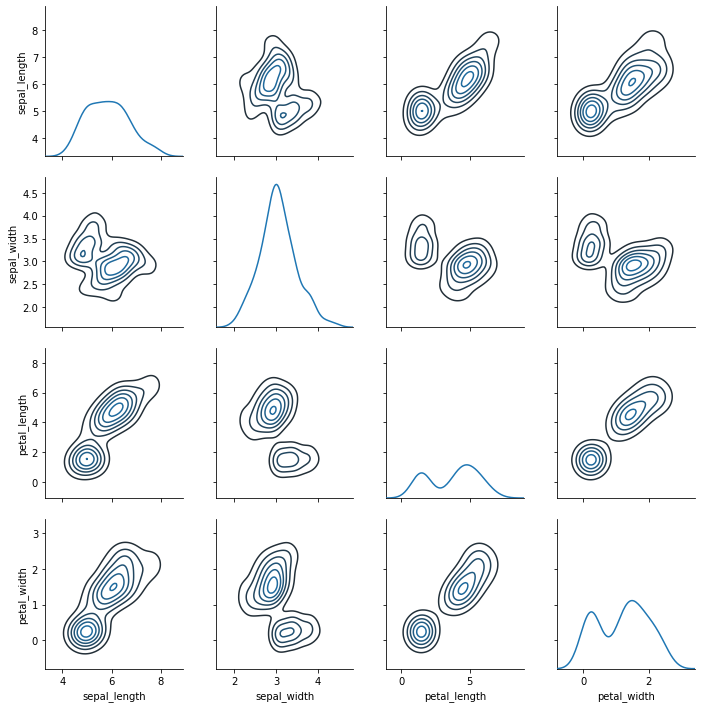

In [15]:
g = sns.PairGrid(X_train)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

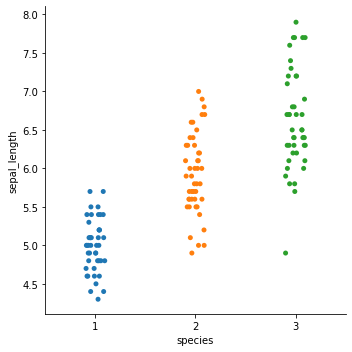

In [16]:
sns.catplot(x="species", y = "sepal_length", data = train)

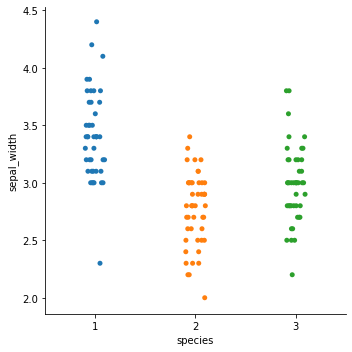

In [17]:
sns.catplot(x="species", y = "sepal_width", data = train)

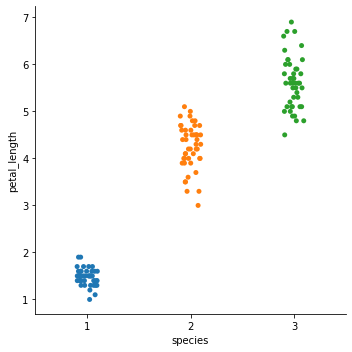

In [18]:
sns.catplot(x="species", y = "petal_length", data = train)

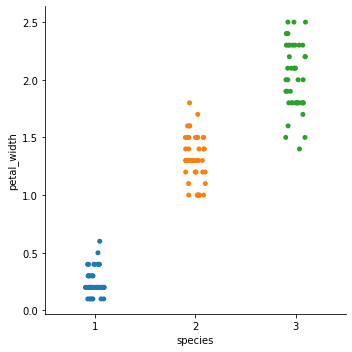

In [19]:
sns.catplot(x = "species", y = "petal_width", data = train)

Our visual analysis shows that different species indeed have different features. Let's try to implement Machine Learning to predict wether a flower belongs to either class 1, 2 or 3.

In [21]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [33]:
len(y_train)

135

In [34]:
y_train = y_train.reshape(len(y_train),)

In [35]:
from sklearn.svm import SVC

In [36]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(svm_clf, X_train, y_train, cv = 3, scoring = "accuracy")

/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/robertpormetter/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.93478261, 0.91304348, 0.90697674])

Just on this first try, we already found a pretty great classifier. Let's see, if there are better classifiers:

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
cross_val_score(knn, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.95652174, 0.93478261, 0.90697674])